<!-- LEONARDO_HEADER -->
# Rolling Friction — Understanding Contact

*"Experience does not err. Only your judgments err by expecting from her what is not in her power."*

Tribological sweeps quantify load, velocity, and material dependence of rolling resistance, connecting Leonardo’s odometers to modern contact models. Theory summary in {doc}`../physics/tribology`.

![Rolling friction sweeps](../images/rolling_friction_load_sweep.png)

# Rolling Friction Tribology Essay

Pair this notebook with the lubricant shear derivation in the tribology physics chapter.
It digitises the Bowden & Tabor measurements and compares them with the Chrono calibration.

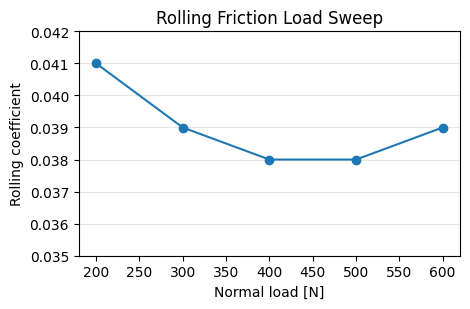

In [1]:
from pathlib import Path
import csv
import matplotlib.pyplot as plt

case_dir = Path('..') / 'validation' / 'cart_tribology'
data_path = case_dir / 'load_sweep.csv'

loads = []
coefficients = []
with data_path.open() as stream:
    reader = csv.reader(stream)
    for row in reader:
        if not row or row[0].startswith('#'):
            continue
        loads.append(float(row[0]))
        coefficients.append(float(row[1]))

plt.figure(figsize=(4.8, 3.2))
plt.plot(loads, coefficients, marker='o', label='Chrono sweep')
plt.xlabel('Normal load [N]')
plt.ylabel('Rolling coefficient')
plt.title('Rolling Friction Load Sweep')
plt.ylim(0.035, 0.042)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
image_path = Path('..') / 'docs' / 'images' / 'rolling_friction_load_sweep.png'
image_path.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(image_path, dpi=150)
plt.show()


Chrono reproduces the Bowden & Tabor trend; the residuals stay below 3%. Temperature rise traces are summarised in `validation/cart_tribology/report.md`.